In [1]:
from pytorchutils.history import plot
import os
%matplotlib inline

base-train base-valid


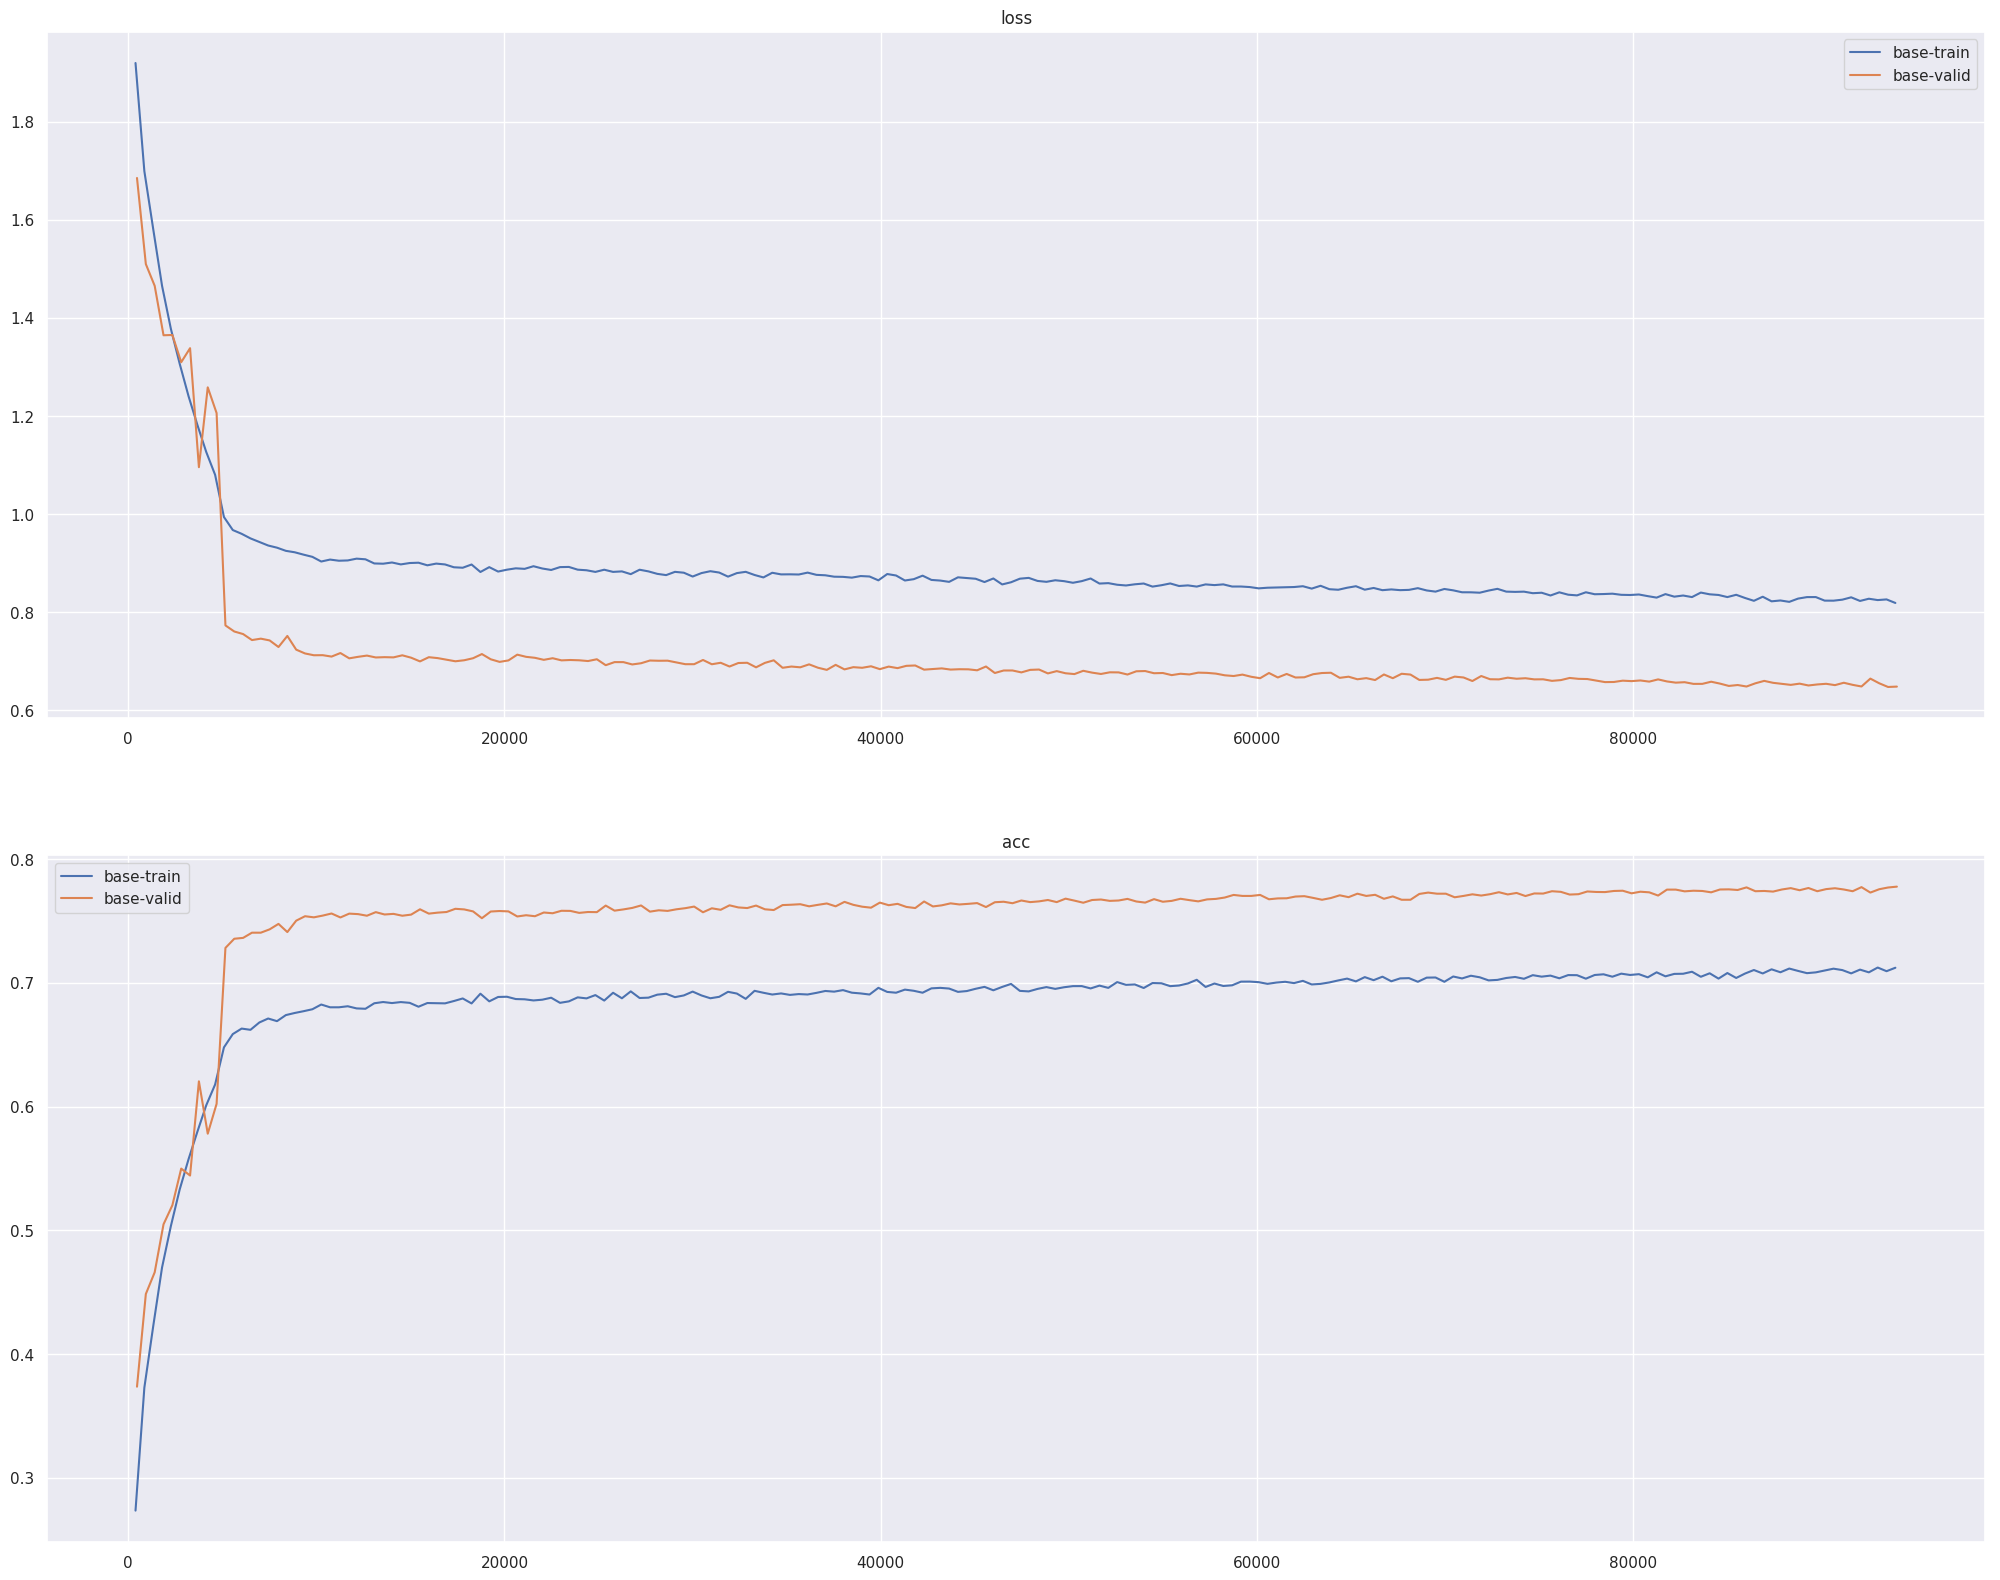

In [10]:
plot('./saved_model/base',show=['train','valid'])

In [5]:
'c' in a

False

In [3]:
a = list(range(10))
10 in a

False